In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## Obtain the train and test data

In [2]:
#Load the train and test data from the CSV files we have prepared earlier.
train = pd.read_csv('UCI_HAR_Dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_Dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [3]:
#Display the first 5 rows of the train data
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [4]:
#Display the first 5 rows of the test data
test.head(5)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [5]:
#Get X_train and y_train from csv files
X_train = train.drop(['Subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

In [6]:
#Get X_test and y_test from test csv file
X_test = test.drop(['Subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [7]:
print('Dimensions of X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('Dimensions of X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

Dimensions of X_train and y_train : ((7352, 561),(7352,))
Dimensions of X_test  and y_test  : ((2947, 561),(2947,))


# Let's build some Machine Learning models on top of our data!

### Labels that are useful in plotting confusion matrix

In [8]:
labels=['LAYING','SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot a Normalized Confusion Matrix the confusion matrix

In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')

### Function to plot the Area under the Curve for  Receiver Operating Characteristic

In [10]:
#This function is used to plot the ROC curve on validation data. Check out the authors GitHUb profile for ref ===> https://github.com/reiinakano/scikit-plot
#Alternative way SciKit learn ===> https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings
def plot_roc_curve(model, X_test, y_test):
    import scikitplot as skplt
    import matplotlib.pyplot as plt
    skplt.metrics.plot_roc(y_test, y_probas=model.predict_proba(X_test), figsize=(12,8),title='Validation ROC AUCs for each of the 6 Class Labels')
    plt.show()

### Generic function to run any model specified

In [11]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    
    #To store results at various phases during training as well as cross validation stages
    results = dict()
    
    #Time at which model starts training 
    train_start_time = datetime.now()
    print('Training the model...')
    model.fit(X_train, y_train)
    print('Training completed... \n \n')
    train_end_time = datetime.now()
    results['Training_Time'] =  train_end_time - train_start_time
    print('Training Time (HH:MM:SS.ms) -- {}\n\n'.format(results['Training_Time']))
    
    
    #Predict the test data
    print('Predicting test data...')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Predicting test data completed... \n \n')
    results['Testing_Time'] = test_end_time - test_start_time
    print('Testing Time(HH:MM:SS:ms) -- {}\n\n'.format(results['Testing_Time']))
    results['Predicted'] = y_pred
   

    #Compute the F1 score 
    f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') #F1 = 2 * (precision * recall) / (precision + recall)
    
    #Store F1 Score in results
    results['F1_Score'] = f1_score
    print('---------------------')
    print('|      F1 Score      |')
    print('---------------------')
    print('\n    {}\n\n'.format(f1_score))      
    

    #Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    #Plot the Confusion matrix 
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['Confusion_Matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n')
               
    #Plot Non normalized confusion matrix using seaborn heatmap.
    import seaborn as sn
    df_cm = pd.DataFrame(cm, index = class_labels, columns = class_labels)
    plt.figure(figsize = (7,7))
    ax = sn.heatmap(df_cm, annot=True, fmt='d', cmap=plt.cm.Blues)   #fmt='d' for decimal integer.
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title('NON NORMALIZED CONFUSION MATRIX')
    
    #Plot the Normalized confusion matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='NORMALISED CONFUSION MATRIX', cmap = cm_cmap)
    plt.show()
    
    #Display the classification report having individual class recalls and precision values.
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    
    #Store report in results
    results['Classification_Report'] = classification_report
    print(classification_report)
    
    #Add the trained  model to the results
    results['Model'] = model
    
    #Plot the ROC AUC curve
    #plot_roc_curve(model, X_test, y_test)
    
    return results

### Method to print the Grid Search Attributes

In [12]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))   

## 1. Applying Logistic Regression with Grid Search CV to obtain the best hyperparameters and train the model.

In [13]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

Training the model...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.6min finished


Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:05:50.828602


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.009474


---------------------
|      F1 Score      |
---------------------

    0.9616559212758737


---------------------
|      Accuracy      |
---------------------

    0.9616559212758737


--------------------
| Confusion Matrix |
--------------------




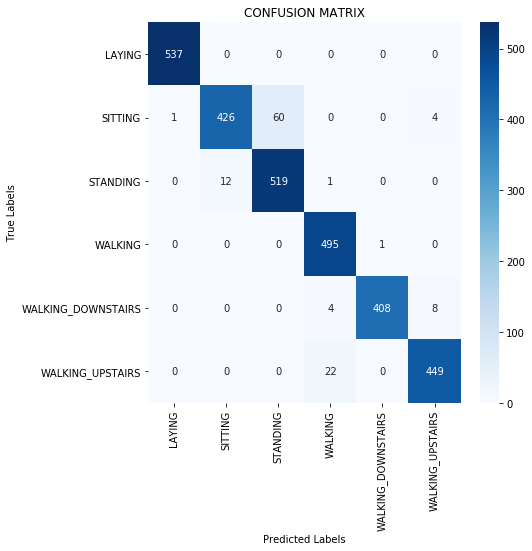

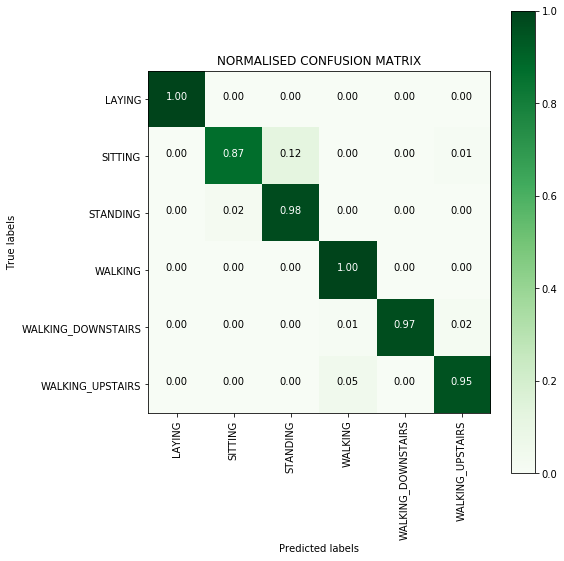

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.93       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

       avg / total       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=23.71373705661655, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
-----------------------

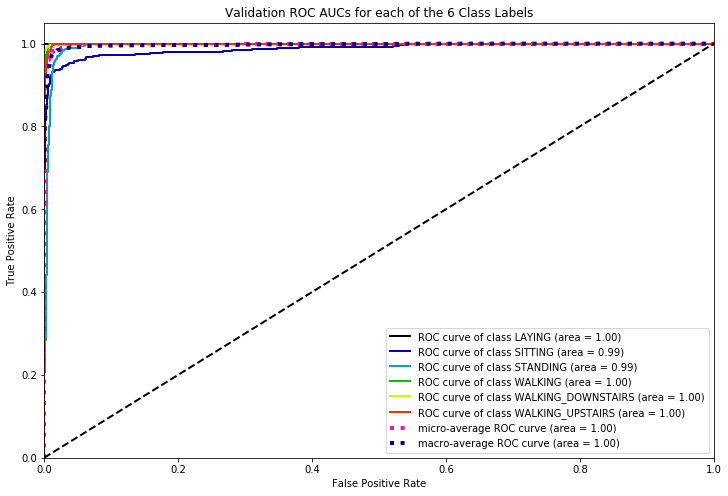

In [19]:
#Start Grid search
parameters = {'C':np.logspace(-3,4,25), 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression(random_state=42) #random_state=42 for reproducibility
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1, scoring='f1_micro')
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(log_reg_grid_results['Model'])
plot_roc_curve(log_reg_grid_results['Model'], X_test, y_test) #Plot the ROC AUC Curve

## Observation:
96.16% acccuracy in classifying new data! Not bad! By looking at the normalized confusion matrix, we can say that the Logistic Regression model has been fairly good in classifying all the actvities with almost 100% precision. However, if we observe closely we can see that this model has reached an accuracy value of 0.87 when it comes to predicitng 'Sitting' activities. This means out of all the activities the model has predicted to belong to the 'Sitting' class, it has made an error of 12% by classifying 12% of the 'Sitting' predictions as 'Standing'. We will try other models to see if this factor improves. Also, the overall recall and precision values are fairly high. Coming to F1-Scores, we can see that the F1 score for all the classes are fairly high! Each of them are more than 95% (except Sitting) which are fairely good. The ROC AUC Curve is an indication that the AUC scores for all the individual class labels are > 0.99. The micro as well as the macro averaged F1 score are 1. This shows the Logistic Regression model has been pretty solid in classifying the Activities.

##  2. Applying Linear SVC with GridSearch to obtain the best hyperparameters and train the model.

In [20]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

Training the model...
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 48.6min finished


Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:48:53.490418


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:01.789188


---------------------
|      F1 Score      |
---------------------

    0.9647098744485918


---------------------
|      Accuracy      |
---------------------

    0.9647098744485918


--------------------
| Confusion Matrix |
--------------------




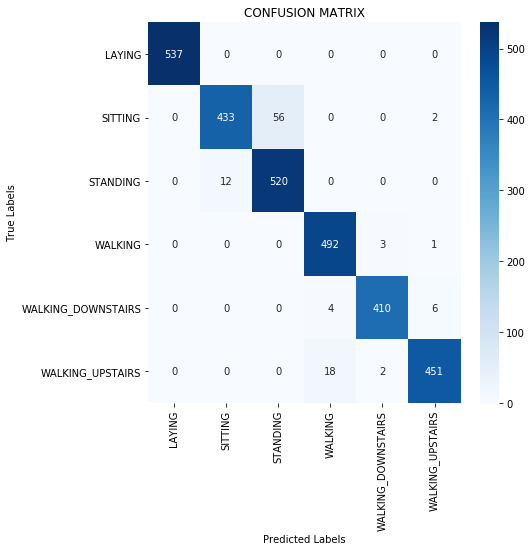

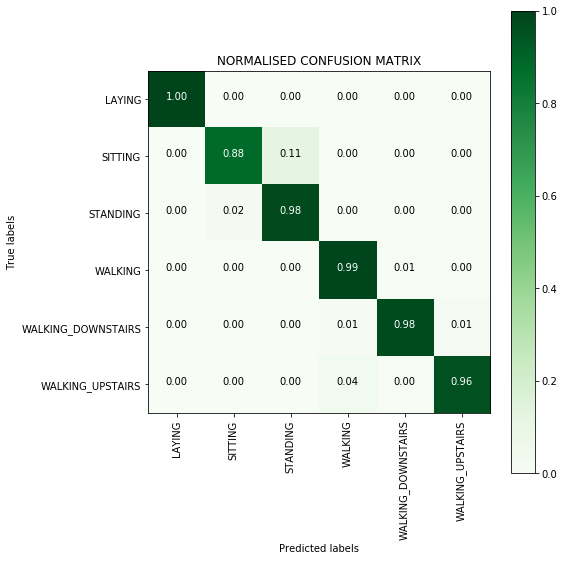

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.93       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.98      0.98       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

       avg / total       0.97      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=3.1622776601683795, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=5e-05, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 



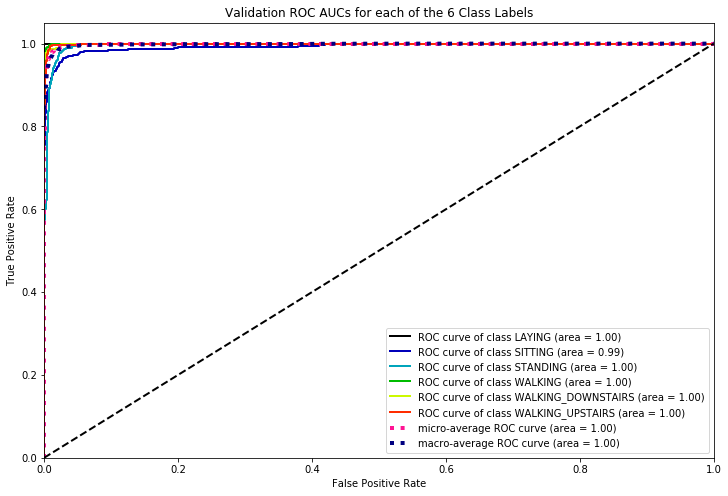

In [21]:
parameters = {'C':np.logspace(-3,4,25), 'gamma':np.logspace(-3,1,8)}
#lr_svc = LinearSVC(tol=0.00005, multi_class='ovr',dual=False) ==> AttributeError: 'LinearSVC' object has no attribute 'predict_proba'
lr_svc = SVC(kernel='linear', probability=True, tol=0.00005, decision_function_shape='ovr', random_state=42)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, cv=3,n_jobs=-1, verbose=1, scoring='f1_micro')
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(lr_svc_grid_results['Model'])
plot_roc_curve(lr_svc_grid_results['Model'], X_test, y_test) #Plot the ROC AUC Curve

## Observation:
By looking at the normalized confusion matrix, we can say that the Logistic Regression model has been fairly good in classifying Laying actvities (100% precision). However, if we observe closely we can see that this model has made a 12% error while trying to classify Sitting and Standing activities. We will try other models to see if this factor improves. Also, the recall and precision values are fairly high. When it comes to Sitting activities, the model has predicted 87% of the activities correctly which are actually classified as sitting activities. In general the model has predicted all the classes correctly with large precisions > 98%, except differentiating between Sitting and Standing activities.

##  3. Applying Kernel SVM with GridSearch to obtain the best hyperparameters and train the model.

Training the model...
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 157.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 253.1min finished


Training completed... 
 

Training Time (HH:MM:SS.ms) -- 4:13:31.105634


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:03.050373


---------------------
|      F1 Score      |
---------------------

    0.9643705463182898


---------------------
|      Accuracy      |
---------------------

    0.9643705463182898


--------------------
| Confusion Matrix |
--------------------




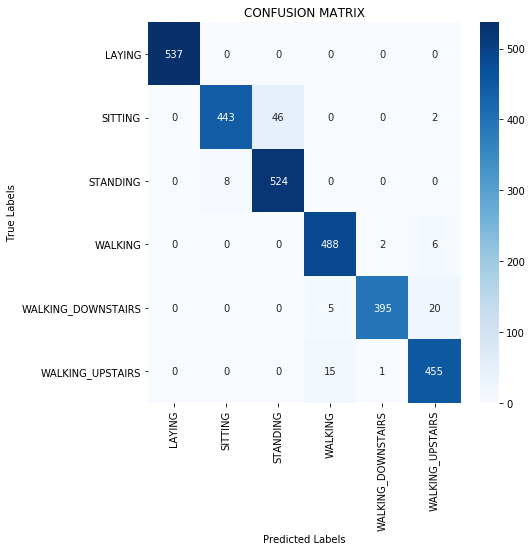

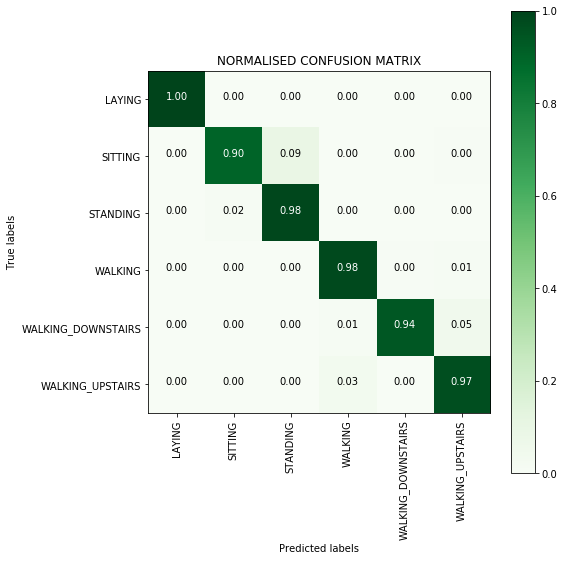

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.90      0.94       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.98      0.97       496
WALKING_DOWNSTAIRS       0.99      0.94      0.97       420
  WALKING_UPSTAIRS       0.94      0.97      0.95       471

       avg / total       0.97      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=35.93813663804626, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=5e-05, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C'

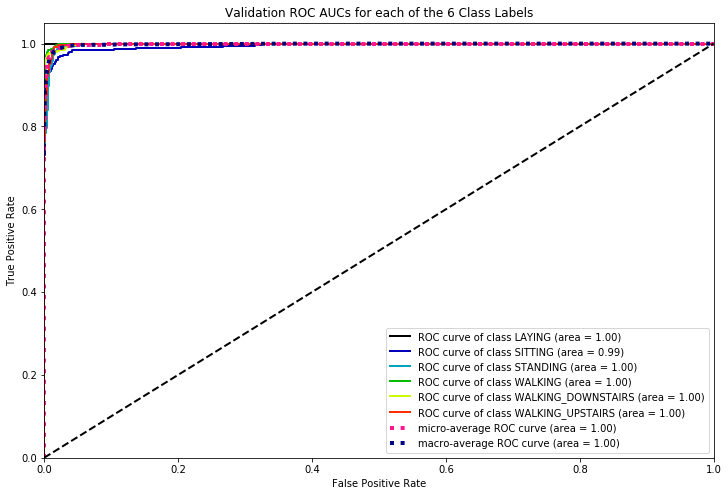

In [22]:
from sklearn.svm import SVC
parameters = {'C':np.logspace(-2,2,10), 'gamma': np.logspace(-2,2,10)}
rbf_svm = SVC(kernel='rbf',probability=True,tol=0.00005, decision_function_shape='ovr', random_state=42)
rbf_svm_grid = GridSearchCV(rbf_svm, param_grid=parameters, cv=3, n_jobs=-1, verbose=1, scoring='f1_micro')
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rbf_svm_grid_results['Model'])
plot_roc_curve(rbf_svm_grid_results['Model'], X_test, y_test) #Plot the ROC AUC Curve

## Observation:
By looking at the normalized confusion matrix we can clearly see that the precision has improved for 'Sitting' activities. (90% as compared to 87% of Linear SVM). Also, we have alsmost a 100% precision for all other activities. The model makes 5% error while trying to predict activities related to 'Walking Downstairs'. This means every 5 out of 100 times the model might classify a Walking Downstairs activity as Walking Upstairs. And every 4 out of 100 times the model might classify a 'Walking Upstairs' activity as simply 'Walking' on the plain road. Not bad! This has almost reached Human Level Performance, with all the feature engineering that we have done.

# 4. Decision Trees with GridSearchCV

Training the model...
Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   31.3s finished


Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:00:40.744532


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.004475


---------------------
|      F1 Score      |
---------------------

    0.8534102477095352


---------------------
|      Accuracy      |
---------------------

    0.8534102477095351


--------------------
| Confusion Matrix |
--------------------




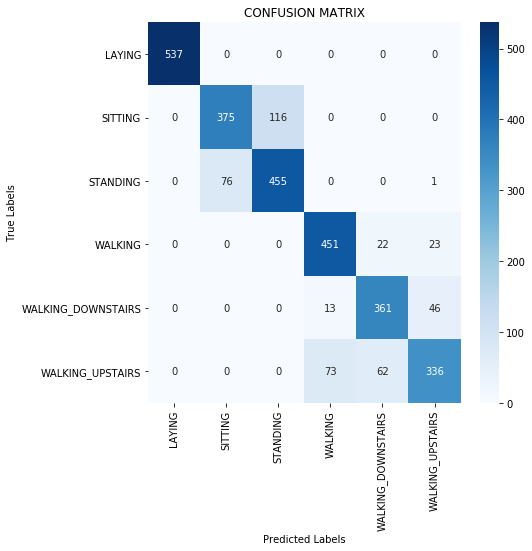

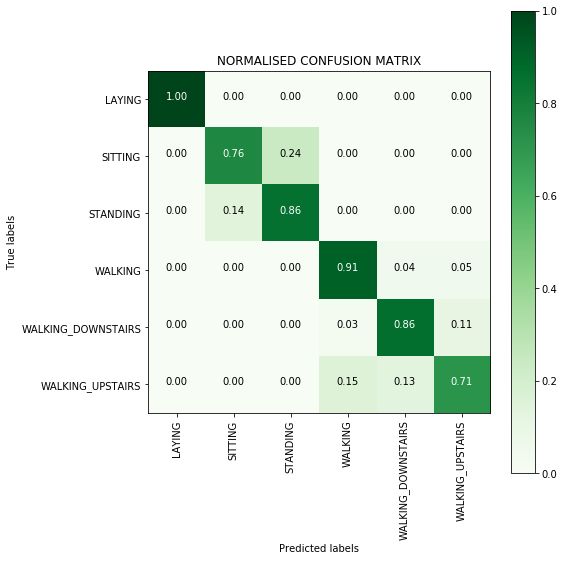

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.83      0.76      0.80       491
          STANDING       0.80      0.86      0.83       532
           WALKING       0.84      0.91      0.87       496
WALKING_DOWNSTAIRS       0.81      0.86      0.83       420
  WALKING_UPSTAIRS       0.83      0.71      0.77       471

       avg / total       0.85      0.85      0.85      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

------

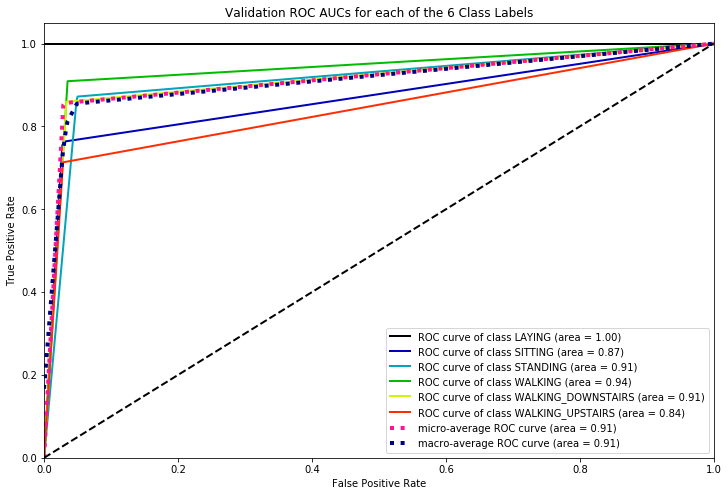

In [23]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,20,2), 'criterion': ['gini','entropy']}
dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1, cv=3, scoring='f1_micro', verbose=1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['Model'])
plot_roc_curve(dt_grid_results['Model'], X_test, y_test) #Plot the ROC AUC Curve

## Observation:
By looking at the normalized confusion matrix we can see that Decision Trees are nopt a good choice when it comes to this problem of Human Activity Recognition. 21 out of 100 times the model has predicted a 'Sitting' activity to be a 'Standing' activity. 17 times it has predicted a 'Standing' activity to a be 'Sitting' one. The laying activities were predicted with 100% precision, accuracy and recall.  The model also did well in predicting 'Walking' activities with 95% accuracy. The rest of the classes were not well classified. So we can conclude that DTs are fairly bad for this problem.

# 5. Random Forest Classifier with GridSearch

Training the model...
Fitting 3 folds for each of 220 candidates, totalling 660 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed: 12.8min finished


Training completed... 
 

Training Time (HH:MM:SS.ms) -- 0:12:58.080288


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.040194


---------------------
|      F1 Score      |
---------------------

    0.9178825924669155


---------------------
|      Accuracy      |
---------------------

    0.9178825924669155


--------------------
| Confusion Matrix |
--------------------




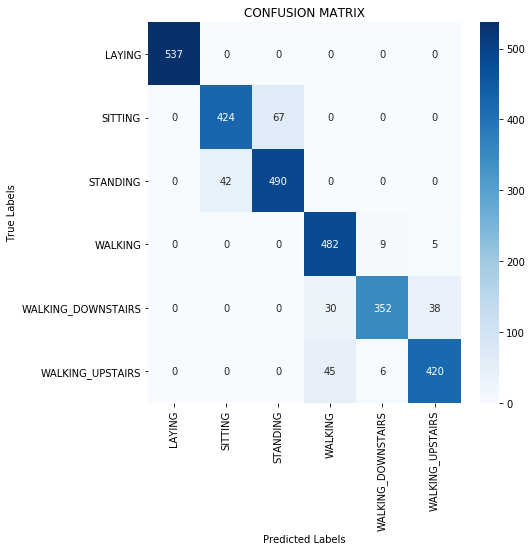

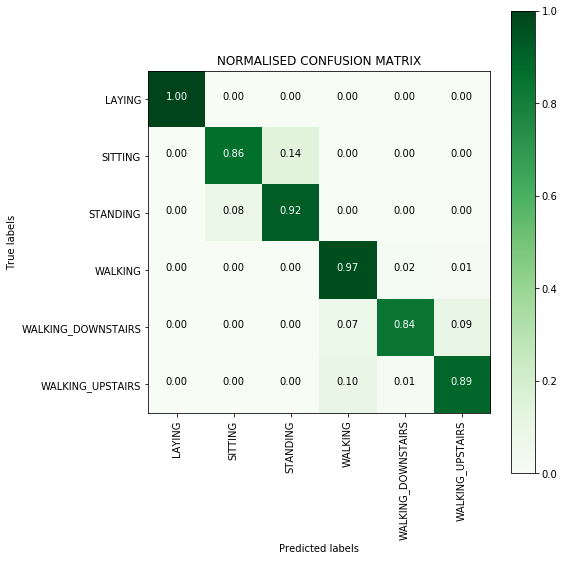

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.86      0.89       491
          STANDING       0.88      0.92      0.90       532
           WALKING       0.87      0.97      0.92       496
WALKING_DOWNSTAIRS       0.96      0.84      0.89       420
  WALKING_UPSTAIRS       0.91      0.89      0.90       471

       avg / total       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
            oob_score=False

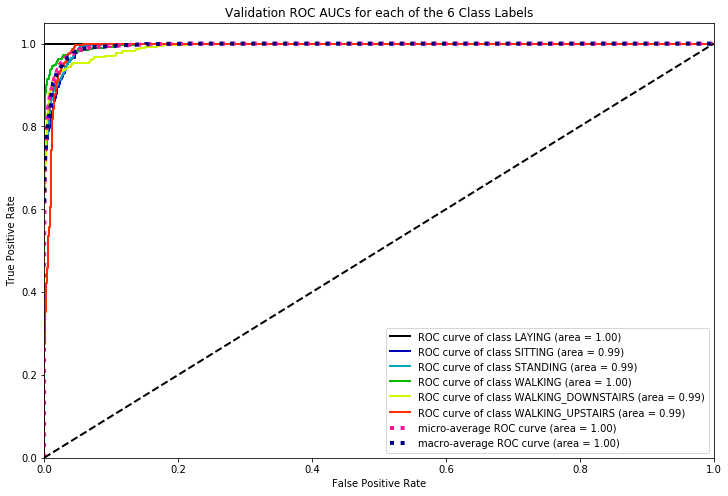

In [24]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,10), 'max_depth':np.arange(3,25,2)}
rfc = RandomForestClassifier(random_state=42)
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1, verbose=1, scoring='f1_micro', cv=3)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['Model'])
plot_roc_curve(rfc_grid_results['Model'], X_test, y_test) #Plot the ROC AUC Curve

## Observation:

Here, the performances of the Random Forest has improved slightly over simple Decision Trees. This can be explained by the randomization factor involved as well the majority voting rule of all the Decision Trees combined. However, the model is not as robust as the Logistic Regression or the Support Vector models we had tried previously. 

# 6.  Gradient Boosted Decision Trees With GridSearch

Training the model...
Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 138.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 317.0min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 414.1min finished


Training completed... 
 

Training Time (HH:MM:SS.ms) -- 7:02:34.895514


Predicting test data...
Predicting test data completed... 
 

Testing Time(HH:MM:SS:ms) -- 0:00:00.081039


---------------------
|      F1 Score      |
---------------------

    0.9406175771971497


---------------------
|      Accuracy      |
---------------------

    0.9406175771971497


--------------------
| Confusion Matrix |
--------------------




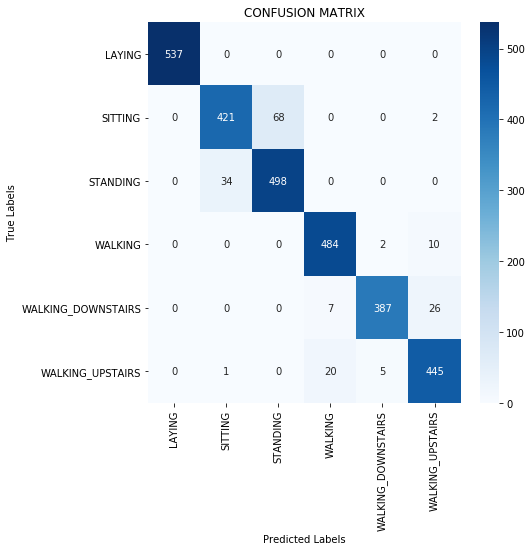

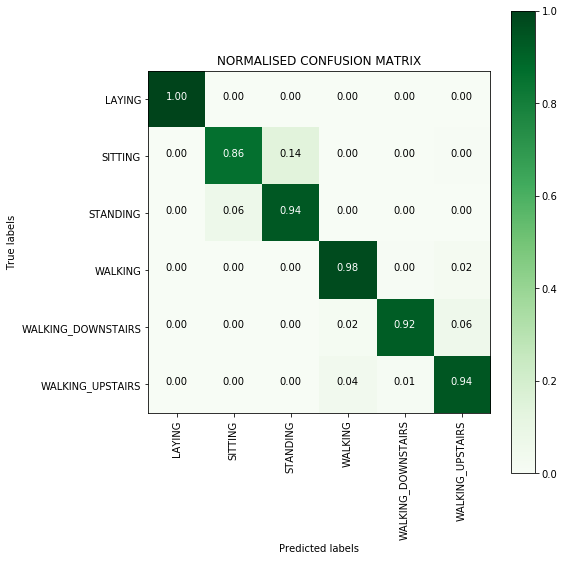

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.86      0.89       491
          STANDING       0.88      0.94      0.91       532
           WALKING       0.95      0.98      0.96       496
WALKING_DOWNSTAIRS       0.98      0.92      0.95       420
  WALKING_UPSTAIRS       0.92      0.94      0.93       471

       avg / total       0.94      0.94      0.94      2947

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimato

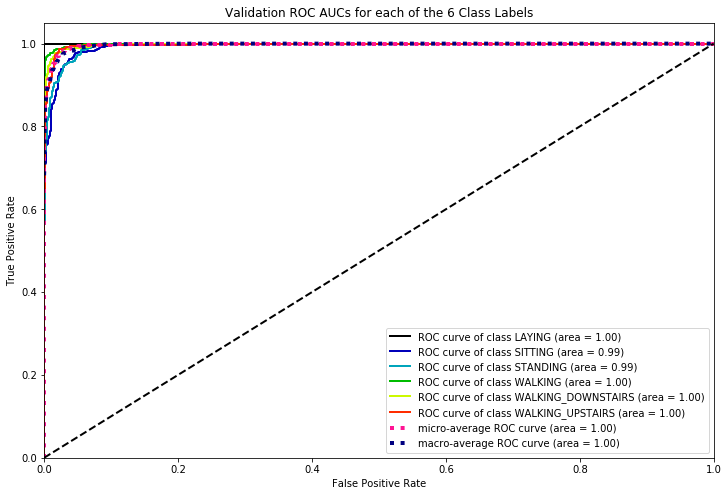

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(3,15,1), 'n_estimators':np.arange(120,200,5)}
gbdt = GradientBoostingClassifier(loss='deviance', random_state=42) #‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1, verbose=1, scoring='f1_micro', cv=3)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['Model'])
plot_roc_curve(gbdt_grid_results['Model'], X_test, y_test) #Plot the ROC AUC Curve

## Observation:

Gradient Boosted Decision trees also performed fairly well. Much better than a single Decision Tree. Hoewever, it's not at alll robust by any means. Since, we can see that for 'Sitting' and 'Walking Downstairs' activities it didn't perform well. In general we could see that all models did well while trying to predict 'Laying', 'Walking' and 'Standing' activities. 


# 7. Comparing all models

In [30]:
print('\n                     Accuracy         Error        F1-Score')
print('                     ----------      --------      ---------')

print('Logistic Regression : {:.04}%          {:.04}%       {:.04}'.format(log_reg_grid_results['Accuracy'] * 100, 100-(log_reg_grid_results['Accuracy'] * 100), log_reg_grid_results['F1_Score']))
print('Linear SVC          : {:.04}%          {:.04}%       {:.04}'.format(lr_svc_grid_results['Accuracy'] * 100, 100-(lr_svc_grid_results['Accuracy'] * 100), lr_svc_grid_results['F1_Score']))
print('rbf SVM classifier  : {:.04}%          {:.04}%       {:.04}'.format(rbf_svm_grid_results['Accuracy'] * 100, 100-(rbf_svm_grid_results['Accuracy'] * 100), rbf_svm_grid_results['F1_Score']))
print('DecisionTree        : {:.04}%          {:.04}%       {:.04}'.format(dt_grid_results['Accuracy'] * 100, 100-(dt_grid_results['Accuracy'] * 100), dt_grid_results['F1_Score']))
print('Random Forest       : {:.04}%          {:.04}%       {:.04}'.format(rfc_grid_results['Accuracy'] * 100, 100-(rfc_grid_results['Accuracy'] * 100), rfc_grid_results['F1_Score']))
print('GradientBoosting DT : {:.04}%          {:.04}%       {:.04}'.format(gbdt_grid_results['Accuracy'] * 100, 100-(rfc_grid_results['Accuracy'] * 100), gbdt_grid_results['F1_Score']))



                     Accuracy         Error        F1-Score
                     ----------      --------      ---------
Logistic Regression : 96.17%          3.834%       0.9617
Linear SVC          : 96.47%          3.529%       0.9647
rbf SVM classifier  : 96.44%          3.563%       0.9644
DecisionTree        : 85.34%          14.66%       0.8534
Random Forest       : 91.79%          8.212%       0.9179
GradientBoosting DT : 94.06%          8.212%       0.9406


# 8. Conclusion :

In the real world, domain-knowledge, EDA and feature-engineering matters most. In this experiment, without a doubt Logistic Regression and Support Vector Machines are clear winners! They have been pretty good in classifying all the 6 classes of data. That too with very high precision and recall values. The individual F1 scores for each of the predicted classes also has very high values. In general, the Decision Trees did not perform well. Random Forests and GBDTs did better than Decision Trees. But, both RFs and GBDTs performed poorly as compared to the Logistic Regression and SVM models.
